# Suicide Rates Overview 1985 to 2016
## Why this topic is important?
Suicide is a leading cause of death. Many factors can increase the risk for suicide or protect against it. Suicide is connected to other forms of injury and violence. For example, people who have experienced violence, including child abuse, bullying, or sexual violence have a higher suicide risk. Being connected to family and community support and having easy access to health care can decrease suicidal thoughts and behaviors.

## Key facts
---
<ul>
    <li>More than 700 000 people die due to suicide every year.</li>
    <li>For every suicide there are many more people who attempt suicide. A prior suicide attempt is the single most important risk factor for suicide in the general population.</li>
    <li>Suicide is the fourth leading cause of death among 15-19 year-olds.</li>
    <li>77% of global suicides occur in low- and middle-income countries.</li>
    <li>Ingestion of pesticide, hanging and firearms are among the most common methods of suicide globally.</li> 
</ul>

__[SOURCE](https://www.who.int/news-room/fact-sheets/detail/suicide)__

### Sample questions this dataset can help finding answers.
<ul>
    <li>How many suicides were commited between 1985 to 2016?</li>
    <li>Which country has the biggest suicide rate per 100k population?</li>
    <li>Is suicide rate increasing or decreasing from 1985 to nowadays?</li>
    <li>Which gender commits more suicides?</li>
    <li>What is the correlation index between age and suicide rate?</li>
    <li>Visualize suicides age "pyramid".</li>
    <li>What is the correlation between GDP and suicide rate?</li>
    
</ul>

"Suicide Rates Overview 1985 to 2016" __[DATASET](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)__ from kaggle 


In [1]:
# "Suicide Rates Overview 1985 to 2016" dataset from kaggle
# https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [2]:
# importing libraries

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plots
import seaborn as sns # visualizations
import re # regular expressions

### Inspecting/Cleaning the data

In [3]:
# loading the data into pandas dataframe
df = pd.read_csv("data/suicide.csv")
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
# Checking for column names and null values
col_names = df.columns
print(col_names)

df.isnull().sum()

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
# droping 'HDI for year' column with too many NaN values, no need in analysis anyway
df = df.drop(['HDI for year'], axis = 1)

In [8]:
# extracting only year from 'country_year' column
df['country-year'] = df['country-year'].apply(lambda x: int(re.findall("[0-9]+", x)[0]))

In [9]:
df['country-year']

0        1987
1        1987
2        1987
3        1987
4        1987
         ... 
27815    2014
27816    2014
27817    2014
27818    2014
27819    2014
Name: country-year, Length: 27820, dtype: int64

In [10]:
# Checking if column 'year' is equal to column 'country_year' and if yes then dropping 'country_year' column
set(df['year'] == df['country-year'])

{True}

In [11]:
# Droping 'country-year' column, because it is the same as 'year' column 
df = df.drop(['country-year'], axis=1)

In [12]:
# Renaming columns
df = df.rename(columns = {' gdp_for_year ($) ': 'gdp_for_year', 'gdp_per_capita ($)': 'gdp_per_capita'})
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

In [13]:
df.describe(include='all')

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,6
top,Austria,NaN,male,15-24 years,NaN,NaN,NaN,"80,797,945,205",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,24874.000000,NaN


### Exploring numerical Data Distribution

In [14]:
# numerical data is separated into it's own dataframe
num_df = df.select_dtypes(include = ['float64', 'int64'])
del num_df['year']
num_df.head()

,suicides_no,population,suicides/100k pop,gdp_per_capita
0,21,312900,6.71,796
1,16,308000,5.19,796
2,14,289700,4.83,796
3,1,21800,4.59,796
4,9,274300,3.28,796


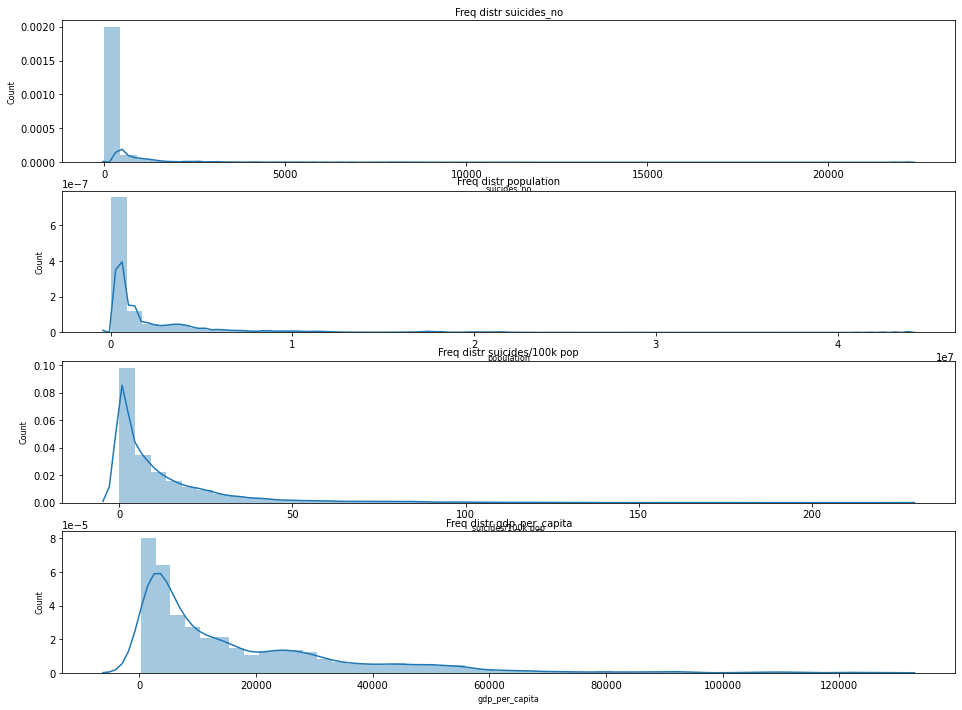

In [15]:
# distribution plot using seaborn library
colu_names = num_df.columns
fig, ax = plt.subplots(len(colu_names), figsize=(16,12))

# looping through the columns and creating a distribution plot for each one
for i, colu_val in enumerate(colu_names):
    sns.distplot(num_df[colu_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq distr ' + colu_val, fontsize=10)
    ax[i].set_xlabel(colu_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFF9A4B8E0>,
      dtype=object)

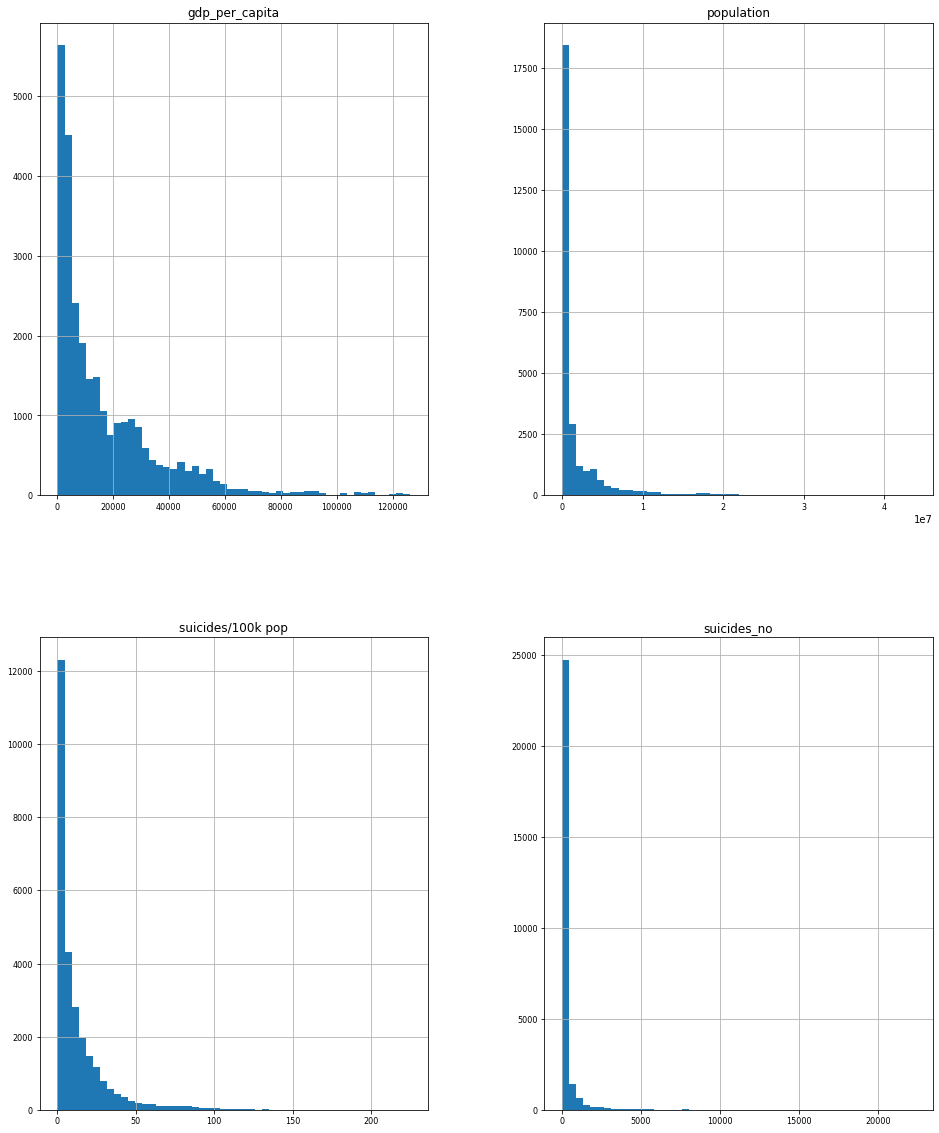

In [16]:
num_df.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

**Note:** All the values of each column are skewed to the left with a similar distribution probably due to outliers.

### Pair Plots & Correlation Matrix to look for correlation between variables, if any

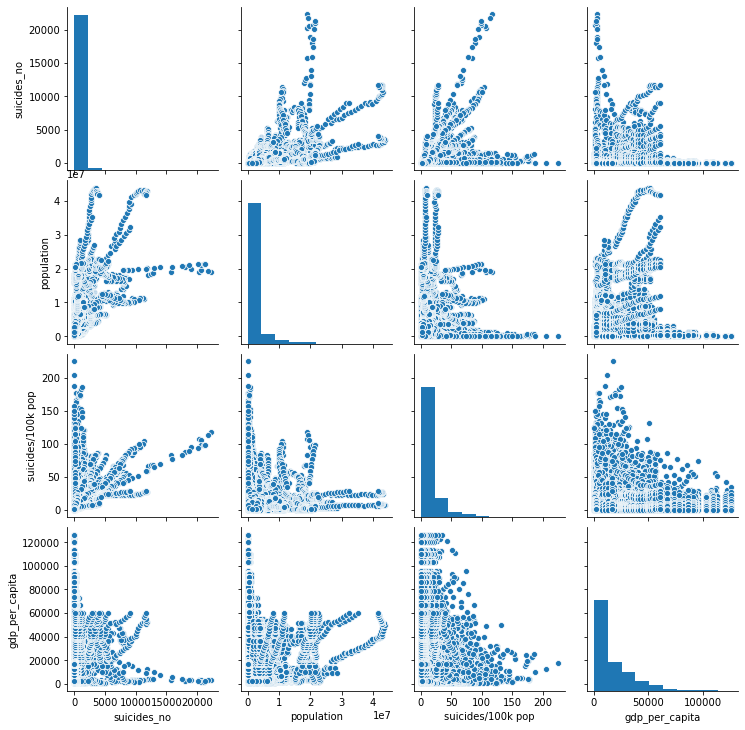

In [17]:
sns.pairplot(num_df, diag_kind='hist')

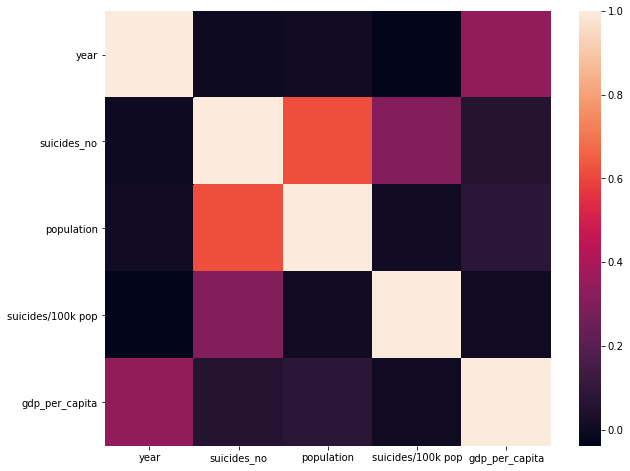

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

**Note:** There is only medium correlation between suicides and population size.

### Outlier Analysis

In [29]:
import scipy.stats

def find_remove_outlier_iqr(data_sample):
    q1 = np.percentile(data_sample, 25)
    q3 = np.percentile(data_sample, 75)
    
    iqr = q3 - q1
    
    cutoff = iqr * 1.5
    
    lower, upper = q1-cutoff, q3+cutoff
    
    outliers =[]
    outliers_removed = []
    for x in data_sample:
        if x < lower or x > upper:
            outliers.append(x)
        if x > lower and x < upper:
            outliers_removed.append(x)
    return outliers

In [30]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

outliers = find_remove_outlier_iqr(df["suicides_no"])

out_df = df[df["suicides_no"].isin(outliers)]
out_df.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
589,Argentina,1985,male,55-74 years,485,1997000,24.29,"88,416,668,900",3264,G.I. Generation
590,Argentina,1985,male,35-54 years,414,3346300,12.37,"88,416,668,900",3264,Silent
601,Argentina,1986,male,55-74 years,530,2008300,26.39,"110,934,442,763",4072,G.I. Generation
602,Argentina,1986,male,35-54 years,478,3365200,14.20,"110,934,442,763",4072,Silent
613,Argentina,1987,male,55-74 years,532,2034500,26.15,"111,106,191,358",4026,G.I. Generation
614,Argentina,1987,male,35-54 years,482,3409100,14.14,"111,106,191,358",4026,Silent
625,Argentina,1988,male,55-74 years,550,2079000,26.46,"126,206,817,196",4458,G.I. Generation
626,Argentina,1988,male,35-54 years,477,3503000,13.62,"126,206,817,196",4458,Silent
637,Argentina,1989,male,55-74 years,548,2105000,26.03,"76,636,898,036",2670,G.I. Generation
638,Argentina,1989,male,35-54 years,462,3561000,12.97,"76,636,898,036",2670,Silent


**These are the outliers found using Interquartile Range method. These outliers could be attributed to countries with exceptionally high suicide rates.**

In [31]:
out_df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita
count,3909.000000,3909.000000,3.909000e+03,3909.000000,3909.000000
mean,2000.955743,1430.363520,7.205532e+06,27.501965,19503.661039
std,8.486900,2029.729897,7.092652e+06,24.036612,16179.294534
min,1985.000000,324.000000,1.882350e+05,1.980000,428.000000
25%,1994.000000,471.000000,2.279600e+06,10.840000,4104.000000
50%,2001.000000,743.000000,4.868128e+06,19.730000,15522.000000
75%,2008.000000,1375.000000,9.334127e+06,36.530000,30375.000000
max,2016.000000,22338.000000,4.380521e+07,185.370000,72856.000000


In [32]:
# creating a dataframe without the outliers
no_out_df = df[~df['suicides_no'].isin(outliers)]
no_out_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [33]:
# creating numerical dataframe without outliers
num_df3 = no_out_df.select_dtypes(include = ['float64', 'int64'])
del num_df3['year']

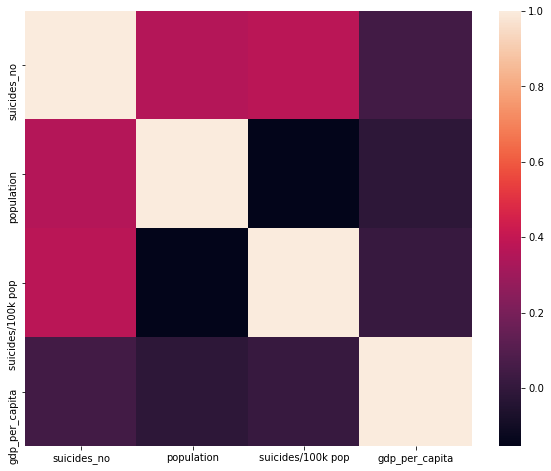

In [34]:
# checking correlation without outliers
f, ax = plt.subplots(figsize=(10,8))
corr = num_df3.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

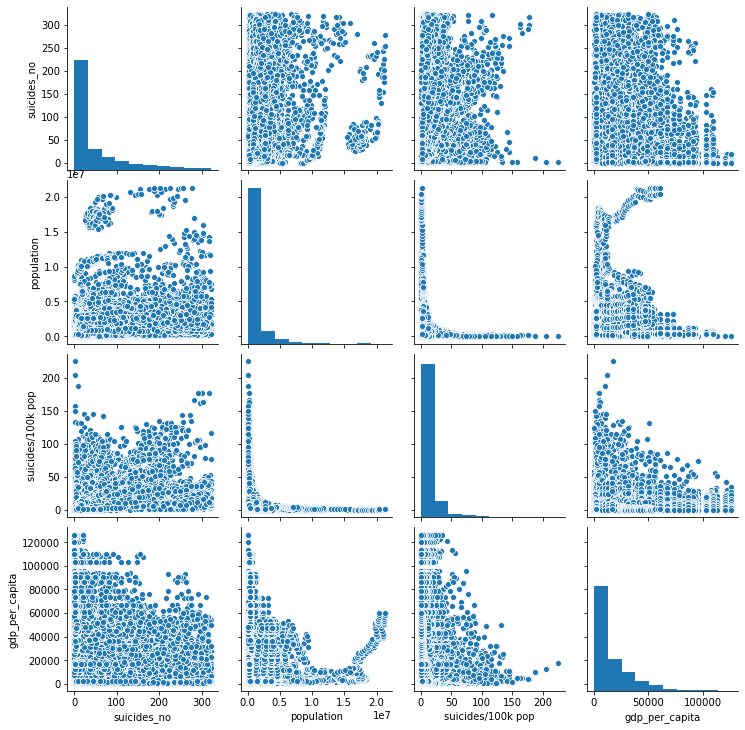

In [35]:
sns.pairplot(num_df3, diag_kind='hist')

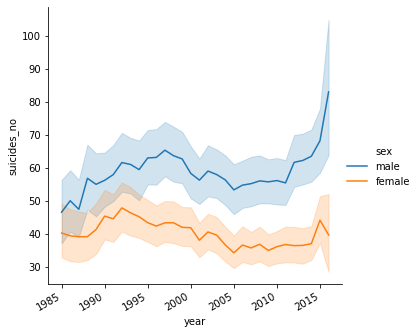

In [36]:
# visualize number of suicides by year
yr = sns.relplot(x = 'year', y = 'suicides_no', kind = 'line', hue = 'sex', data = no_out_df)
yr.fig.autofmt_xdate()

**Males commit more suicides than females and after 2015 there is a spike in male and decline in female suicides commited.**

### Caterogical Data Analysis

Categorization the number of suicides into bins of high, medium or low suicide rates.

In [43]:
group_names = np.array(['low', 'medium', 'high'])
bins = np.linspace(no_out_df['suicides_no'].min(), no_out_df['suicides_no'].max(), 4)
no_out_df['suicides_binned'] = pd.cut(no_out_df['suicides_no'], bins, labels = group_names, include_lowest = True)

no_out_df.head()

<ipython-input-43-8d6ca90caa58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_out_df['suicides_binned'] = pd.cut(no_out_df['suicides_no'], bins, labels = group_names, include_lowest = True)


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation,suicides_binned
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,low
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,low
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,low
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,low
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,low


In [44]:
suicide_gen_df2 = pd.crosstab(no_out_df['suicides_binned'], no_out_df['generation'])

suicide_gen_df2

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
suicides_binned,,,,,,
low,2884,2008,4539,1445,4949,4247
medium,602,302,622,21,325,748
high,332,104,292,4,128,359


Above table shows suicides between different generations and their categories. **Gen Z** has the **lowest rate** of suicides. **Boomers and the Silent Gen** have the **highest** suicides rates.

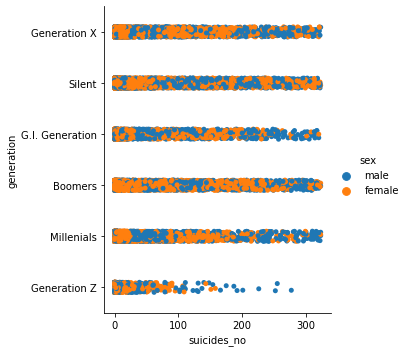

In [45]:
sns.catplot(x = 'suicides_no', y = 'generation', hue = 'sex', data = no_out_df)

Above visualization shows number of suicides for different generations by whether the person is male or female.

In [48]:
suicide_age_df2 = pd.crosstab(no_out_df['suicides_binned'], no_out_df['age'])

suicide_age_df2

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
suicides_binned,,,,,,
low,3367,3259,2534,4543,2793,3576
medium,469,443,605,39,561,503
high,192,217,290,19,376,125


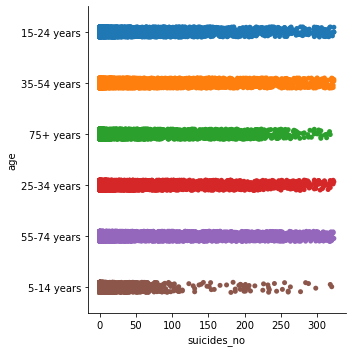

In [56]:
sns.catplot(x = 'suicides_no', y = 'age', data = no_out_df)

In [57]:
avg_df = df.groupby('country').mean()[['suicides_no']]

avg_df

,suicides_no
country,
Albania,7.462121
Antigua and Barbuda,0.033951
Argentina,221.018817
Armenia,6.392617
Aruba,0.601190
Australia,194.752778
Austria,131.081152
Azerbaijan,8.625000
Bahamas,0.336957


Above table shows the **average number of reported suicides per country.**

### Summary

Even in the absence of meaningful correlation between different variables in this dataset, there are some interesting insights.

Males commited more suicides than females. Suicide rate for males after 2015 increased siginificantly compared to previous years.

Generation Z had the lowest number of suicides. This could be because they're still young or potentially due to other factors not visible in this particular dataset. Boomers and the Silent Generation had the highest suicide rate amongst all the different generations.

The highest number of suicides come from those within the 35-54 year old and the 55-74 year old age group. The 5-15 year old age group had the lowest number of suicides.

There were certain countries with abnormally high suicide rates that skewed the data. However I think this information is worth noting. The United States, Russian Confederation, Ukraine, Japan, Germany, and France (to name a few) purported much higher numbers than other countries.